In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import datetime


from sklearn import preprocessing

from sklearn.model_selection import train_test_split  

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score,classification_report


import tensorflow 
from tensorflow import keras
from tensorflow.keras import losses,datasets,optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [2]:
df = pd.read_csv("C:/Users/LENOVO X1 YOGA/Downloads/weatherAUS.csv/weatherAUS.csv")

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Preprocessing and Visualization

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

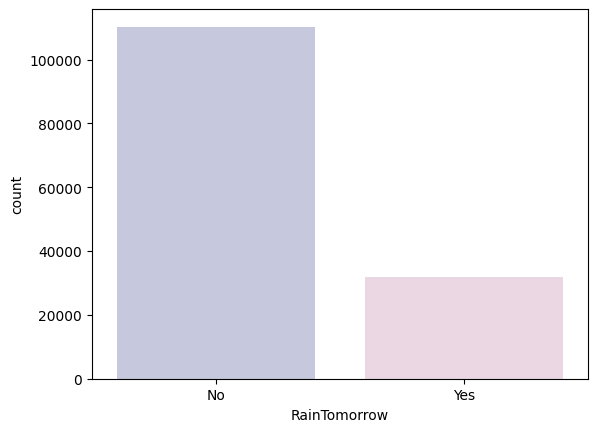

In [9]:
cols = ["#C2C4E2","#EED4E5"]
sns.countplot(df['RainTomorrow'],palette = cols)

<AxesSubplot:>

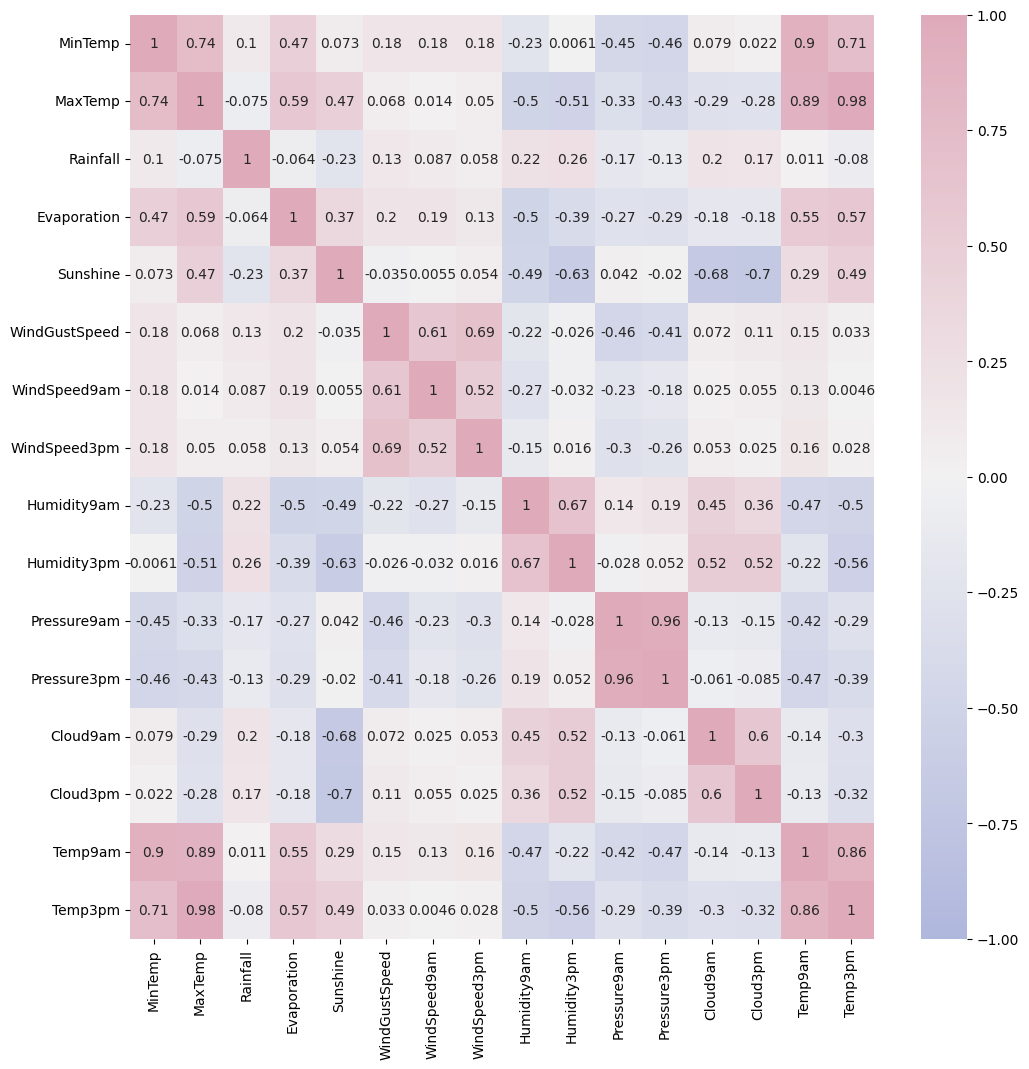

In [10]:

cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap=cmap)

In [11]:
l = df['Date'].str.len()
l.value_counts()

10    145460
Name: Date, dtype: int64

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df['year']  = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day']  = df['Date'].dt.day

In [14]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

Text(0.5, 0, 'Sine Encoded Months')

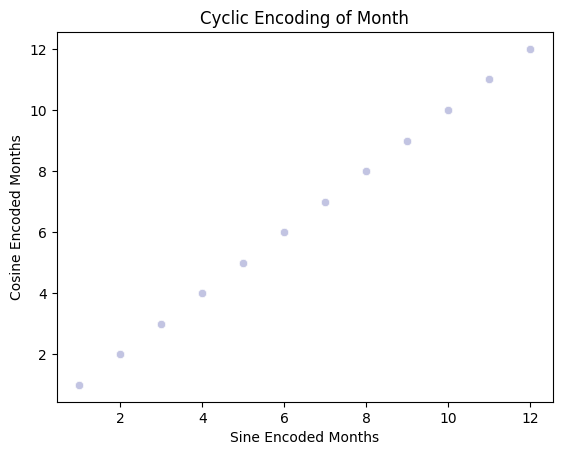

In [15]:
cyclic_month = sns.scatterplot(x="month",y="month",data=df, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

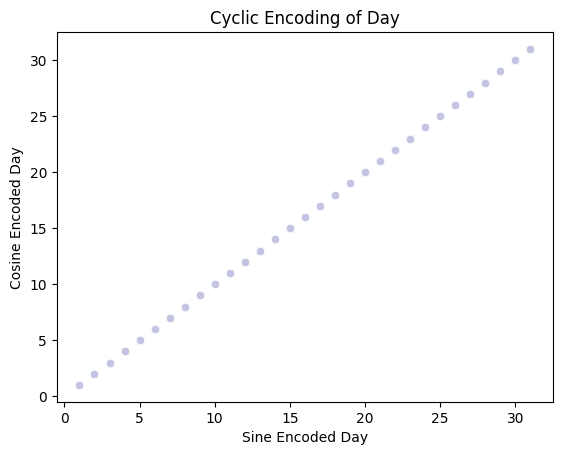

In [16]:
cyclic_day = sns.scatterplot(x='day',y='day',data=df, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

In [17]:
section = df[:360]

In [18]:
section

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2009-11-21,Albury,19.3,21.0,10.6,NaN,NaN,NE,37.0,NE,...,1009.0,8.0,8.0,19.7,20.8,Yes,Yes,2009,11,21
356,2009-11-22,Albury,18.3,28.3,25.8,NaN,NaN,NNW,61.0,NaN,...,1003.5,8.0,8.0,19.2,25.6,Yes,No,2009,11,22
357,2009-11-23,Albury,11.9,23.6,0.4,NaN,NaN,W,24.0,WSW,...,1020.6,NaN,NaN,14.4,22.7,No,No,2009,11,23
358,2009-11-24,Albury,12.8,25.8,0.0,NaN,NaN,WNW,30.0,SSE,...,1021.6,NaN,1.0,18.1,24.9,No,No,2009,11,24


Text(0.5, 0, 'days in month')

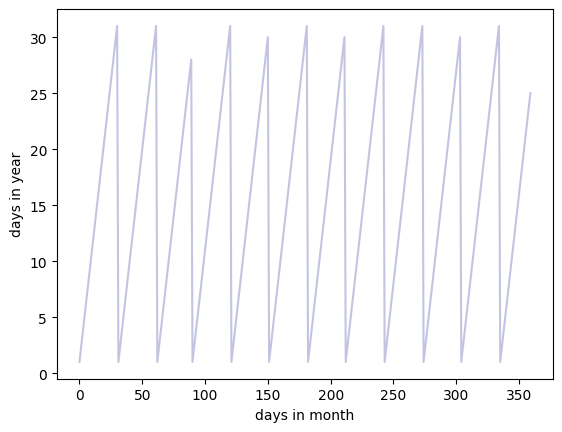

In [19]:
t=section["day"].plot(color="#C2C4E2")
t.set_ylabel('days in year')
t.set_xlabel('days in month')

In [20]:
df['month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [21]:
def encode(df,col,max):
    df[col+'_sin'] = np.sin(2*np.pi*df[col]/max)
    df[col+'_cos'] = np.cos(2*np.pi*df[col]/max)
    return df 

encode(df,'day',31)
encode(df,'month',12)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,day,day_sin,day_cos,month_sin,month_cos
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,12,1,0.201299,0.979530,-2.449294e-16,1.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,12,2,0.394356,0.918958,-2.449294e-16,1.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,12,3,0.571268,0.820763,-2.449294e-16,1.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,12,4,0.724793,0.688967,-2.449294e-16,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,12,5,0.848644,0.528964,-2.449294e-16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,22.4,No,No,2017,6,21,-0.897805,-0.440394,1.224647e-16,-1.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,24.5,No,No,2017,6,22,-0.968077,-0.250653,1.224647e-16,-1.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,26.1,No,No,2017,6,23,-0.998717,-0.050649,1.224647e-16,-1.0
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,26.0,No,No,2017,6,24,-0.988468,0.151428,1.224647e-16,-1.0


Text(0.5, 0, 'Sine Encoded Day')

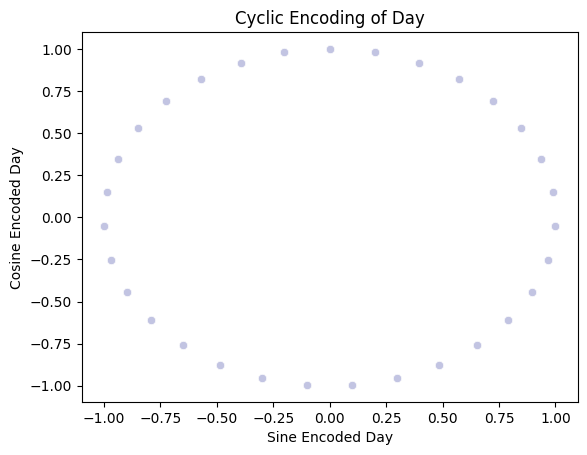

In [22]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=df, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

Text(0.5, 0, 'Sine Encoded Months')

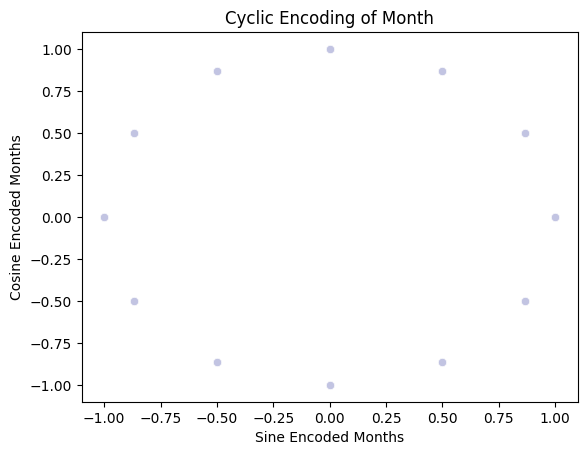

In [23]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=df, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

In [24]:
a = df.dtypes=='object'

In [25]:
a = list(a[a].index)

In [26]:
for i in a:
    print(i,df[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [27]:
for i in a:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [28]:
t = (df.dtypes == 'float')
t = list(t[t].index)
t


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'day_sin',
 'day_cos',
 'month_sin',
 'month_cos']

In [29]:
for i in t:
    print(i,df[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
day_sin 0
day_cos 0
month_sin 0
month_cos 0


In [30]:
for i in t:
    df[i].fillna(df[i].median(),inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

<AxesSubplot:xlabel='year', ylabel='Rainfall'>

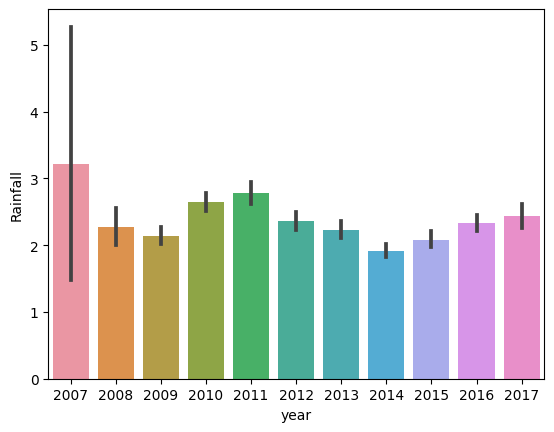

In [32]:
sns.barplot(x = df['year'],y = df['Rainfall'])

<AxesSubplot:xlabel='year', ylabel='WindGustSpeed'>

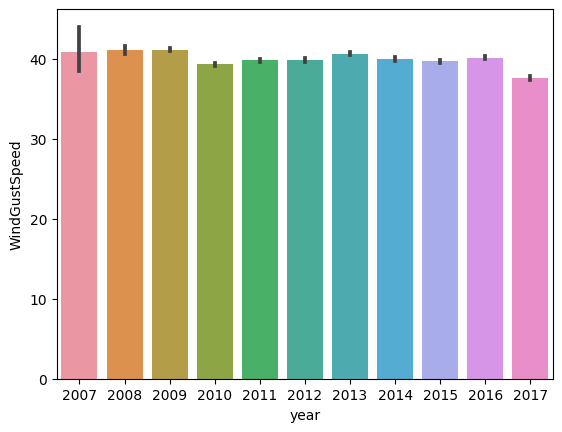

In [33]:
sns.barplot(x=df['year'],y = df['WindGustSpeed'])

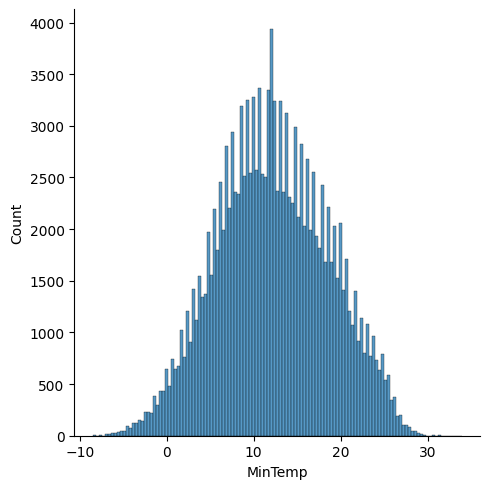

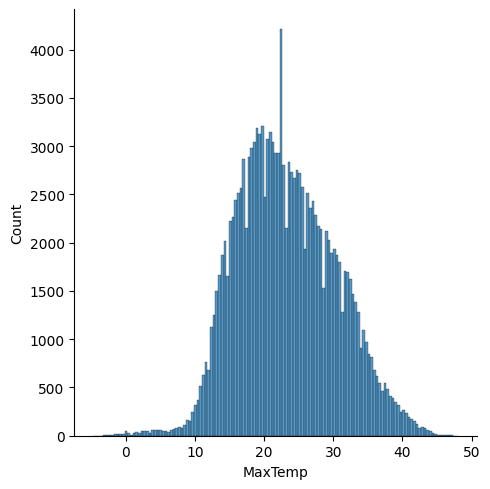

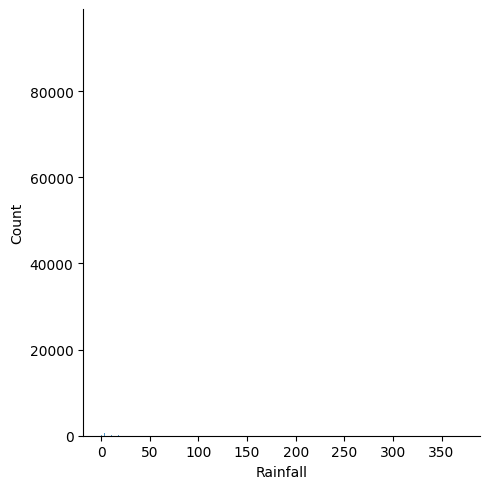

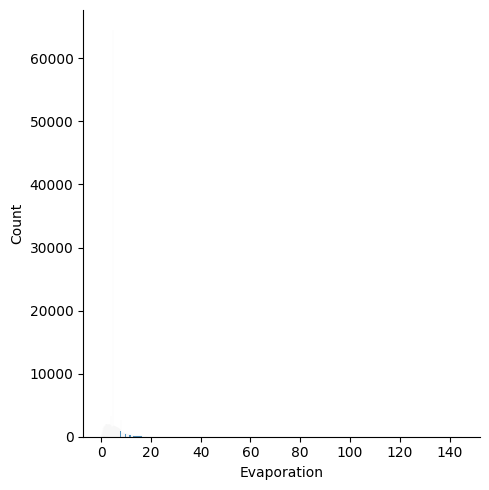

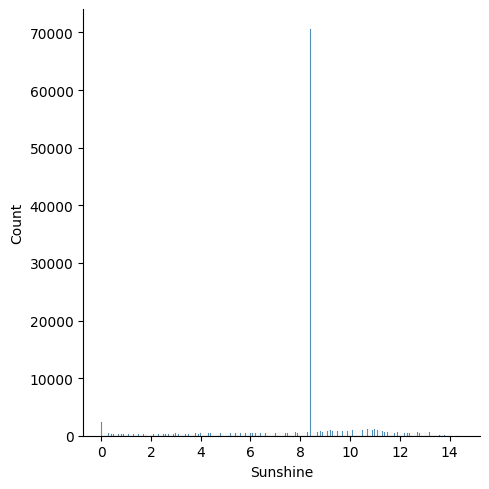

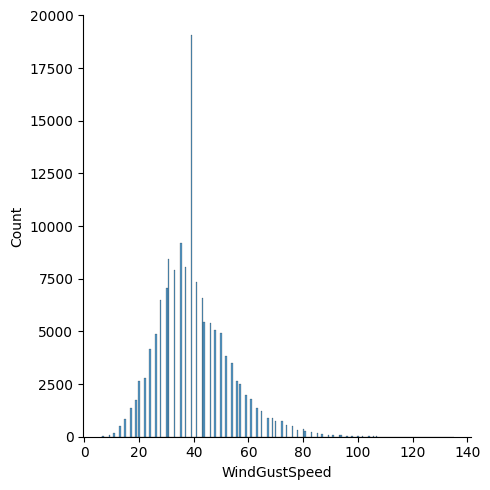

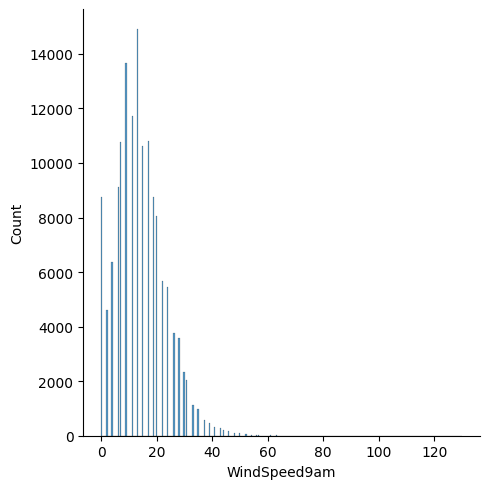

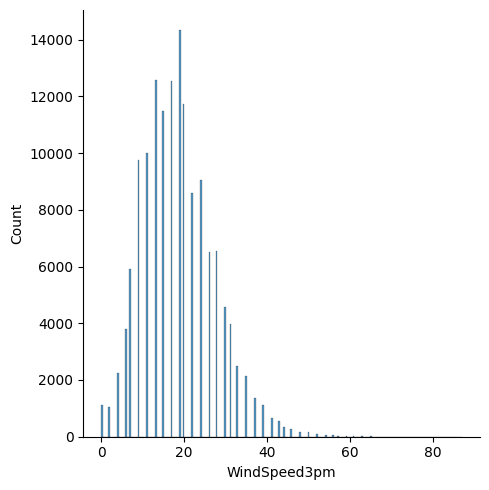

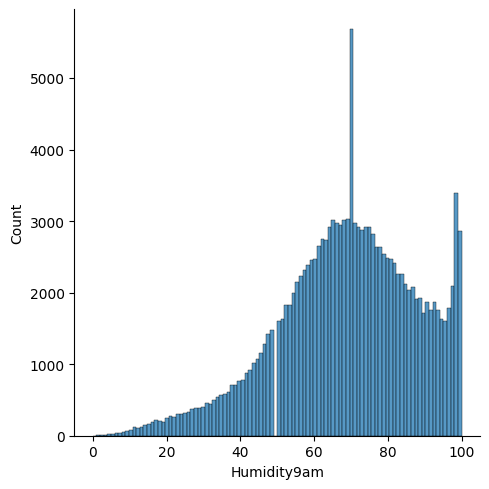

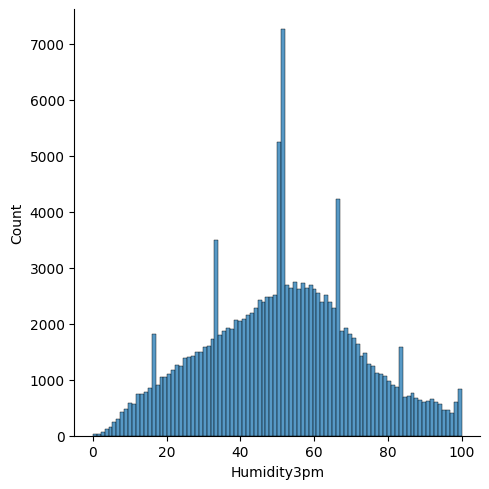

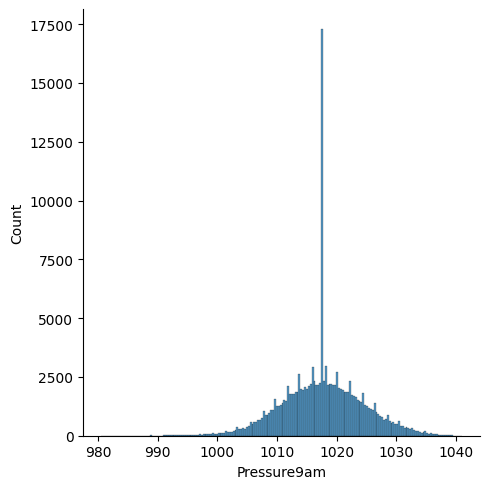

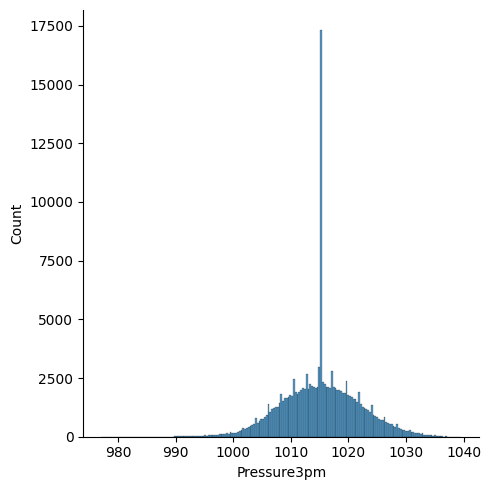

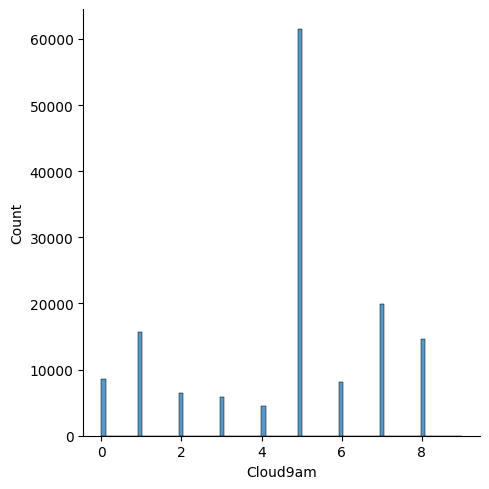

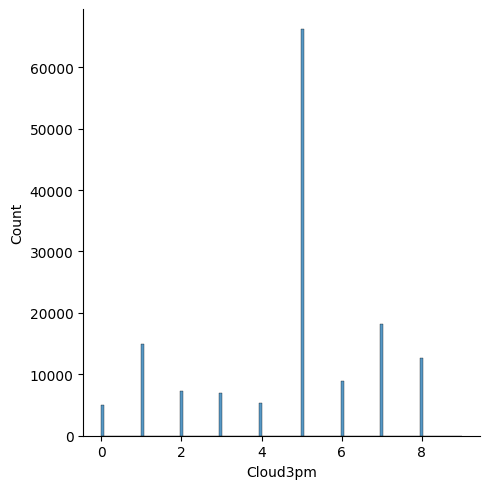

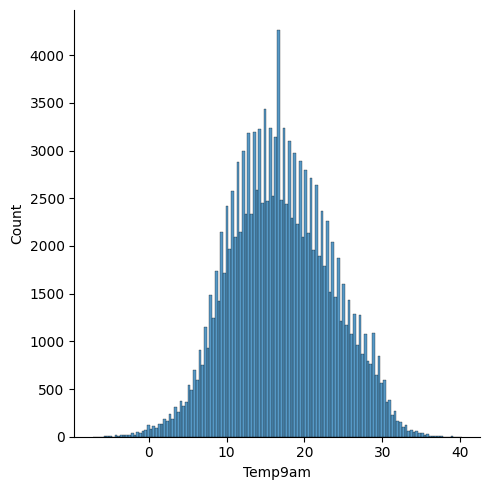

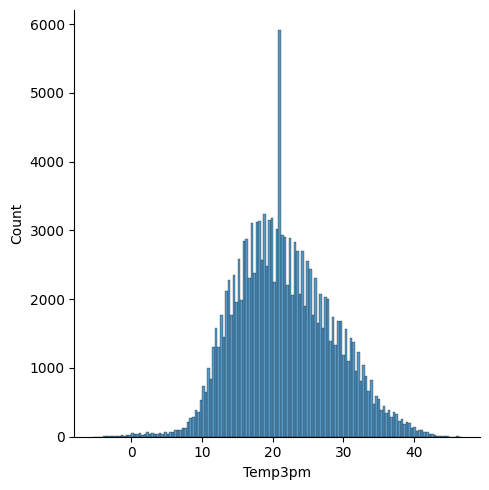

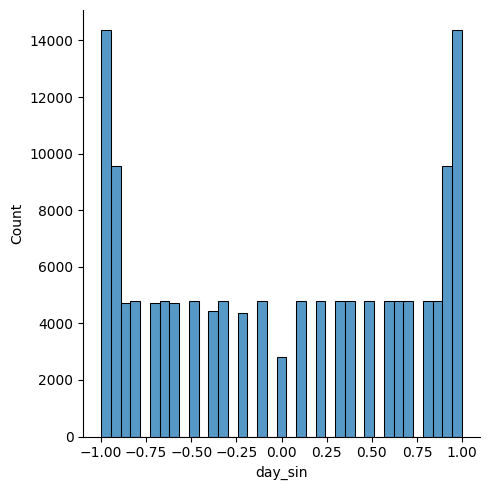

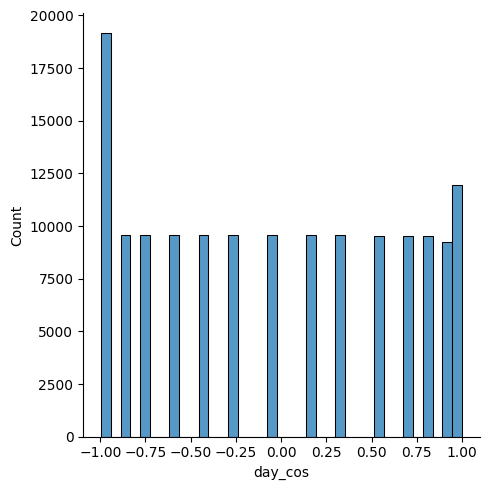

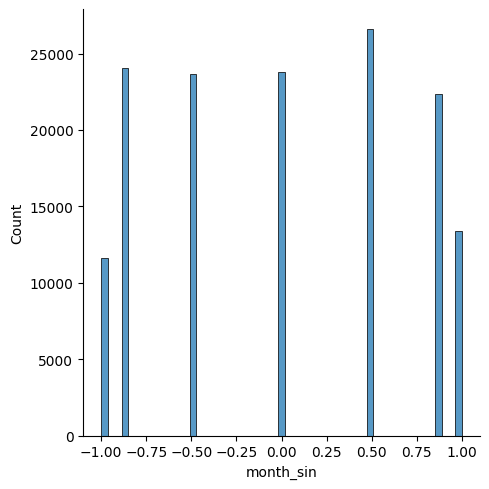

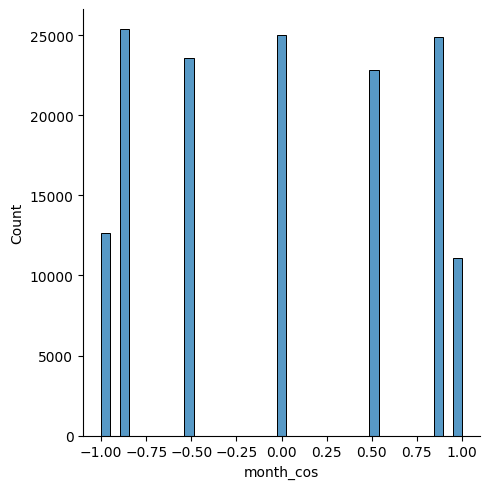

In [34]:
for i in t:
    sns.displot(x = df[i])
    plt.show()

In [35]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,day,day_sin,day_cos,month_sin,month_cos
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,21.8,No,No,2008,12,1,0.201299,0.979530,-2.449294e-16,1.0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,24.3,No,No,2008,12,2,0.394356,0.918958,-2.449294e-16,1.0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,23.2,No,No,2008,12,3,0.571268,0.820763,-2.449294e-16,1.0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,26.5,No,No,2008,12,4,0.724793,0.688967,-2.449294e-16,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,29.7,No,No,2008,12,5,0.848644,0.528964,-2.449294e-16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,...,22.4,No,No,2017,6,21,-0.897805,-0.440394,1.224647e-16,-1.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,...,24.5,No,No,2017,6,22,-0.968077,-0.250653,1.224647e-16,-1.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,...,26.1,No,No,2017,6,23,-0.998717,-0.050649,1.224647e-16,-1.0
145458,2017-06-24,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,...,26.0,No,No,2017,6,24,-0.988468,0.151428,1.224647e-16,-1.0


In [36]:
for i in a:
    print(i,df[i].nunique())

Location 49
WindGustDir 16
WindDir9am 16
WindDir3pm 16
RainToday 2
RainTomorrow 2


## Scaling

In [37]:
label = preprocessing.LabelEncoder()
for i in a:
    df[i] = label.fit_transform(df[i])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int32         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int32         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int32         
 10  WindDir3pm     145460 non-null  int32         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [39]:
features = df.drop(['RainTomorrow','Date','day','month'],axis=1)
target = df['RainTomorrow']
col = list(features.columns)
scaler = preprocessing.StandardScaler()
features = scaler.fit_transform(features)
features = pd.DataFrame(features,columns = col)
features.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,day_sin,day_cos,month_sin,month_cos
count,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,...,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05
mean,7.815677e-18,-4.501830e-16,3.001220e-16,7.815677e-18,-3.282584e-17,-5.424080e-16,6.252542e-18,1.824961e-16,7.190423e-17,8.284618e-17,...,-1.016038e-16,7.346736e-17,7.503050e-17,-6.877796e-17,-8.988029e-18,2.080221e-14,1.075877e-17,-1.353700e-17,5.861758e-19,-2.745257e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.672228e+00,-3.250525e+00,-3.952405e+00,-2.750966e-01,-1.629472e+00,-2.897217e+00,-1.724209e+00,-2.588407e+00,-1.550000e+00,-1.718521e+00,...,-2.042425e+00,-2.235619e+00,-3.750358e+00,-3.951301e+00,-5.297955e-01,-2.273637e+00,-1.403140e+00,-1.392587e+00,-1.434333e+00,-1.388032e+00
25%,-8.991390e-01,-7.056589e-01,-7.358516e-01,-2.750966e-01,-3.711389e-01,7.618832e-02,-8.720745e-01,-6.830475e-01,-8.856691e-01,-8.370983e-01,...,-7.274900e-01,-3.369692e-01,-7.267638e-01,-7.253220e-01,-5.297955e-01,-6.973908e-01,-1.019170e+00,-1.055520e+00,-7.253790e-01,-1.198979e+00
50%,1.451130e-02,-3.016978e-02,-8.689797e-02,-2.750966e-01,-1.194722e-01,1.487104e-01,1.930938e-01,-7.333262e-02,1.050433e-04,4.432411e-02,...,1.491332e-01,1.376932e-01,-4.451676e-02,-8.304572e-02,-5.297955e-01,9.073221e-02,-3.197987e-03,-4.463860e-02,-1.642495e-02,2.308001e-02
75%,8.578808e-01,7.238646e-01,7.031326e-01,-2.035807e-01,6.361088e-03,2.574935e-01,1.045228e+00,4.601679e-01,8.858792e-01,9.257465e-01,...,5.874448e-01,6.123556e-01,6.997527e-01,6.614109e-01,-5.297955e-01,8.788552e-01,1.012774e+00,1.011221e+00,6.925291e-01,7.286359e-01
max,1.701250e+00,3.410112e+00,3.510563e+00,4.394557e+01,4.398511e+01,2.360634e+00,1.471296e+00,7.243246e+00,1.771653e+00,1.586813e+00,...,1.902380e+00,2.036343e+00,3.599302e+00,3.653834e+00,1.887521e+00,1.666978e+00,1.396744e+00,1.455246e+00,1.401483e+00,1.434192e+00


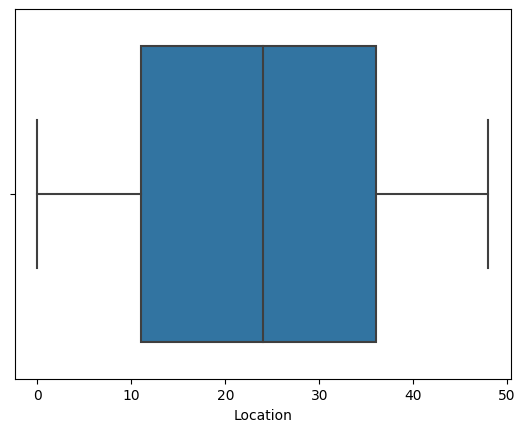

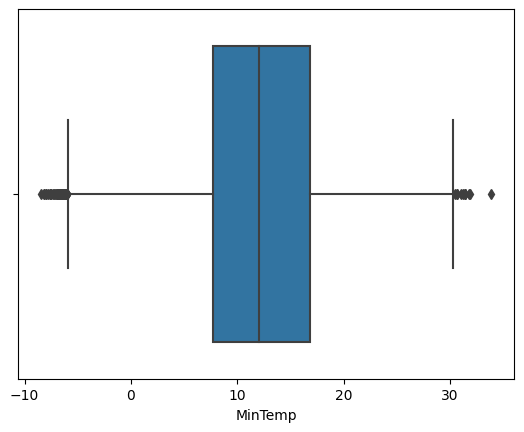

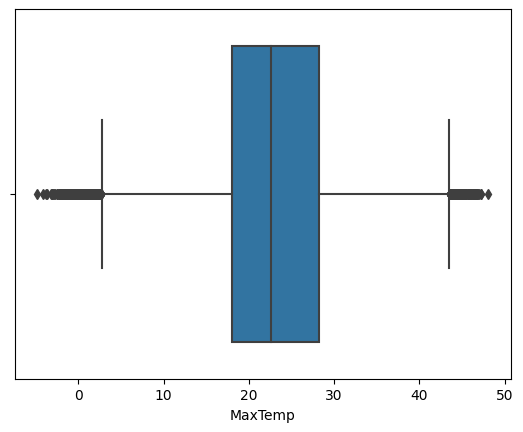

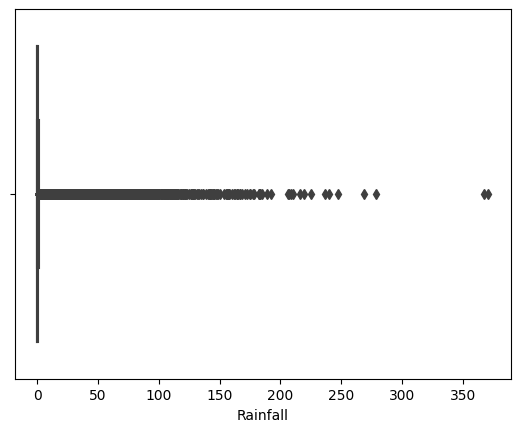

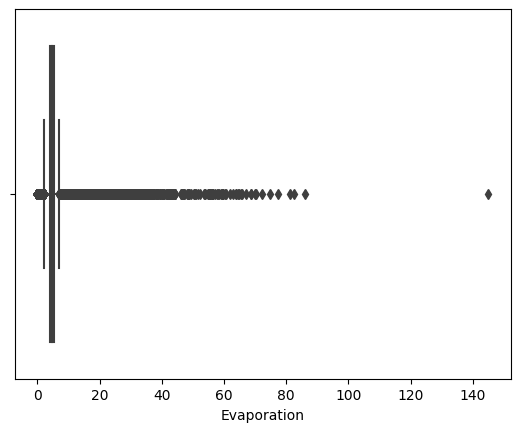

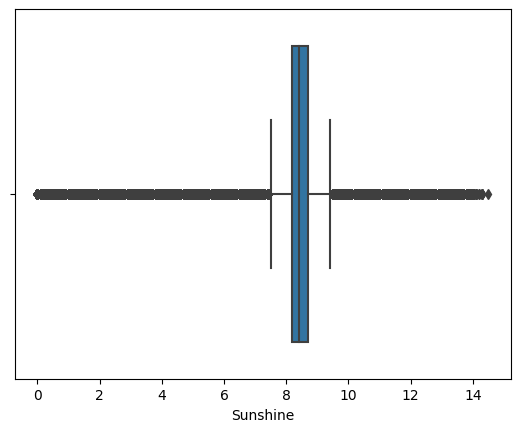

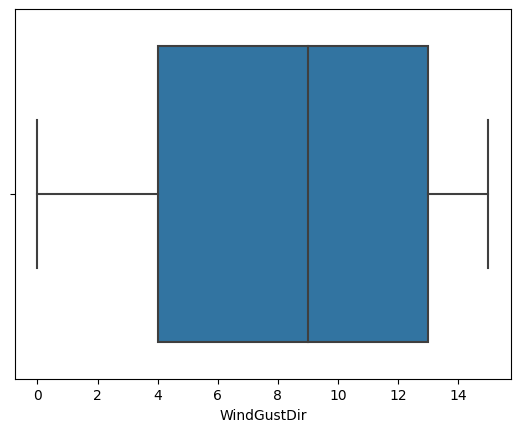

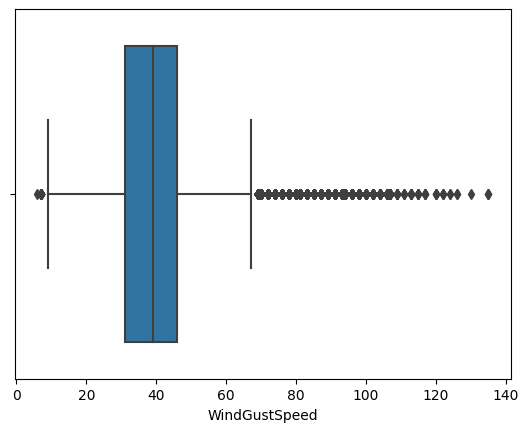

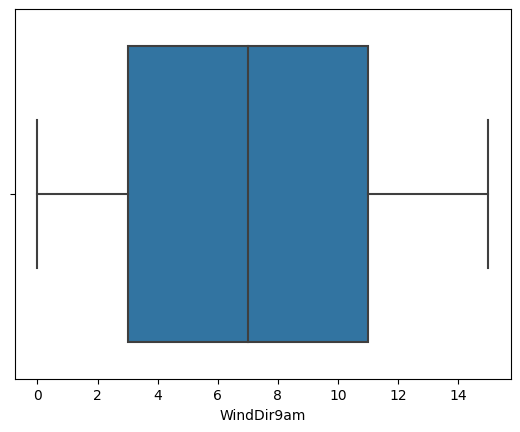

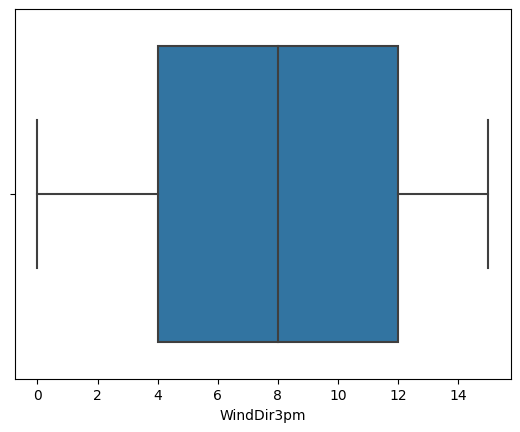

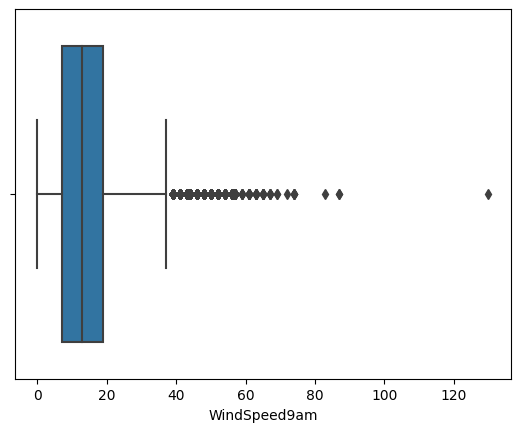

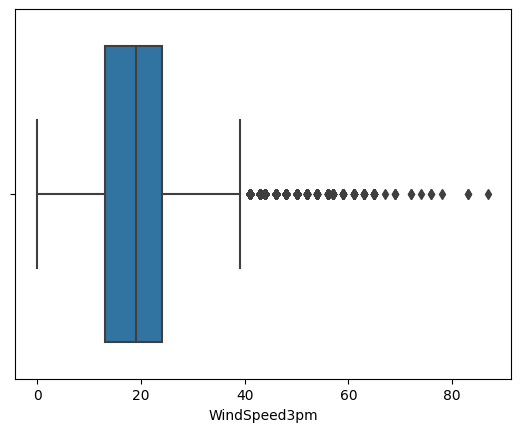

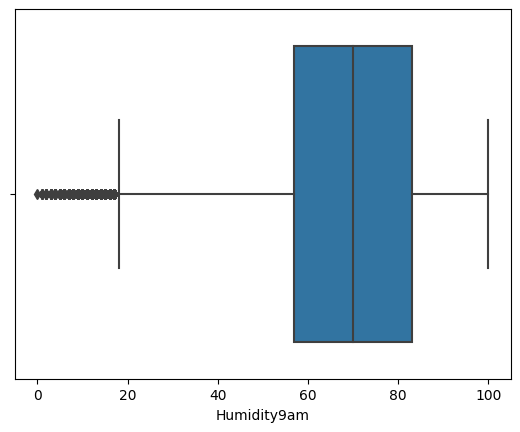

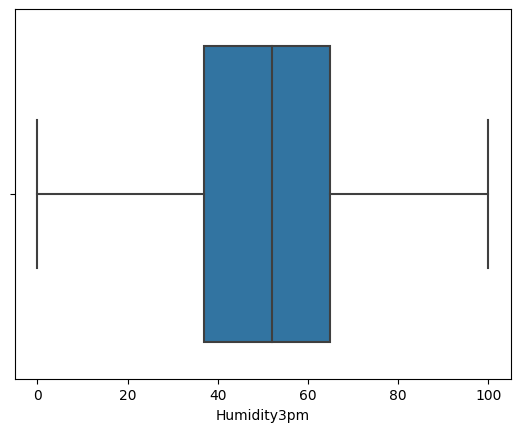

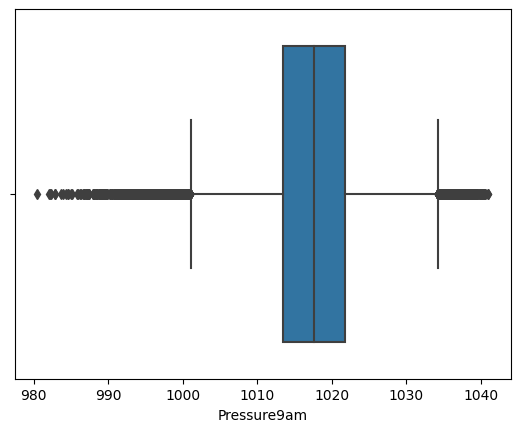

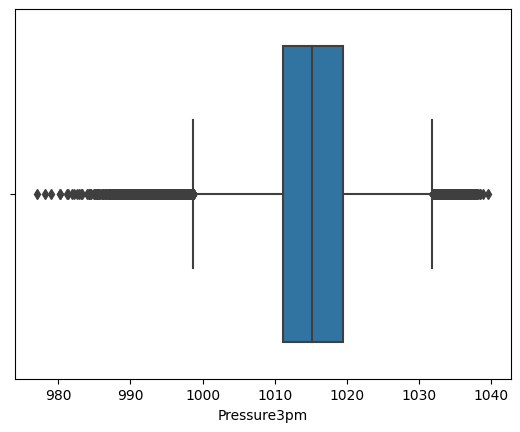

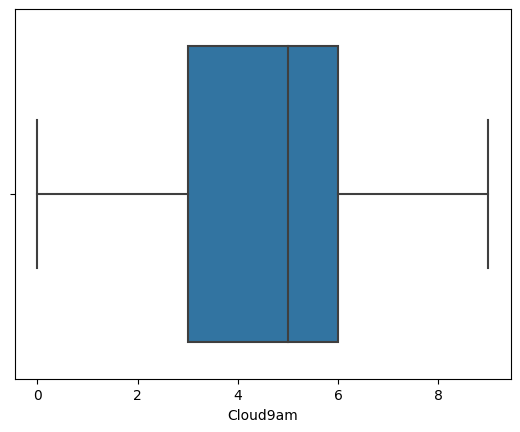

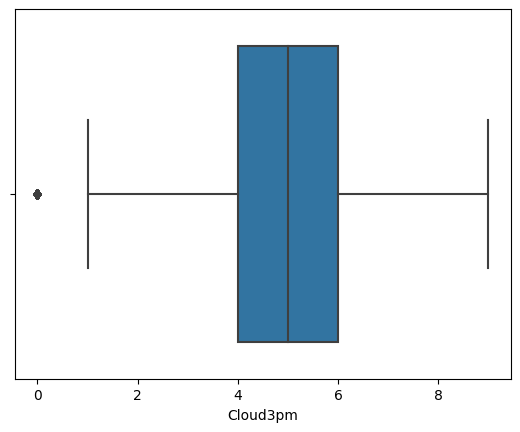

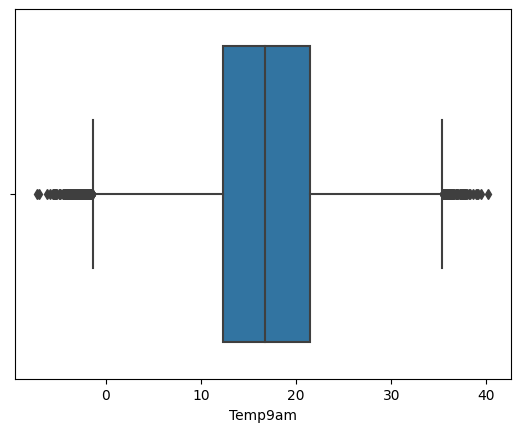

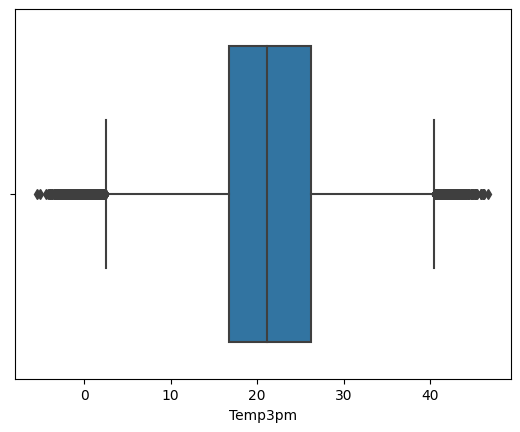

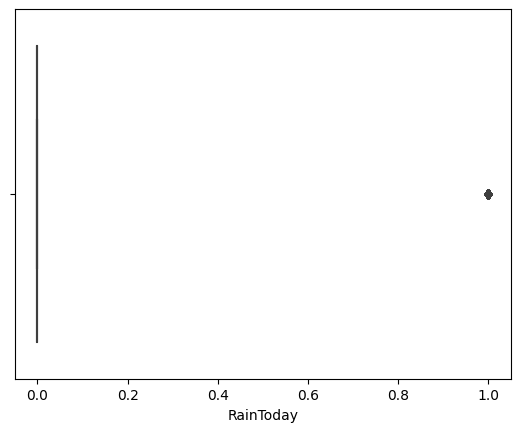

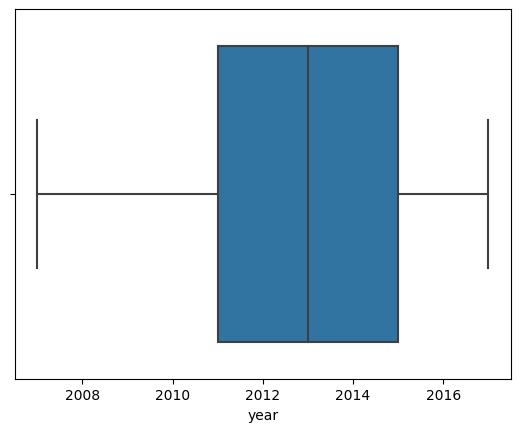

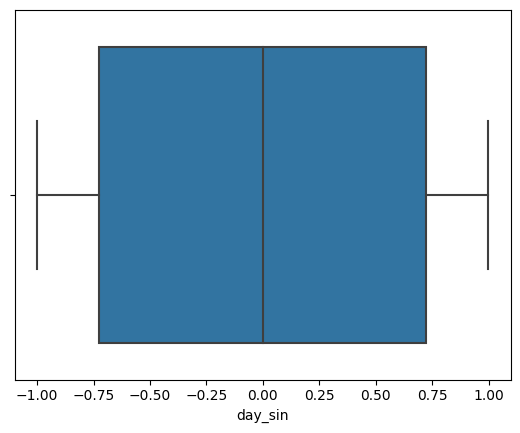

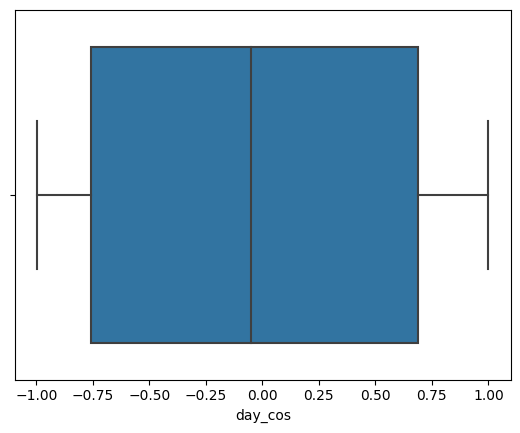

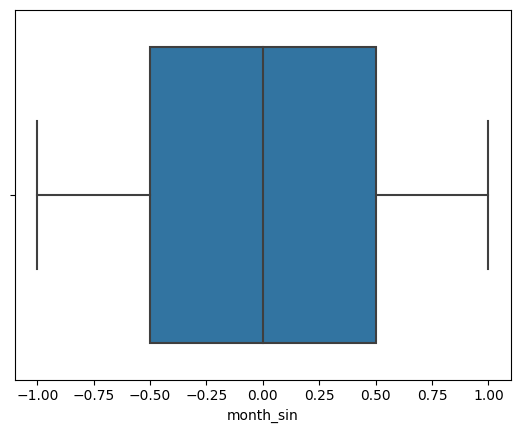

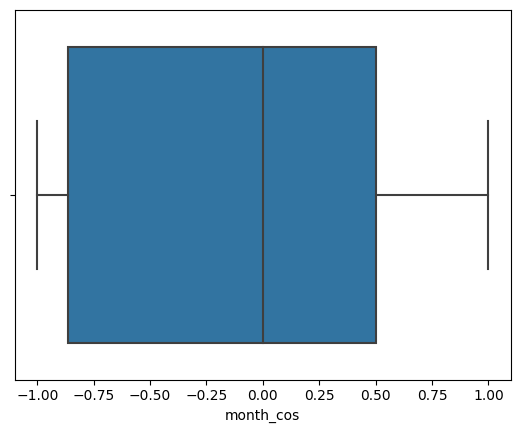

In [40]:
for i in features.columns:
    sns.boxplot(df[i])
    plt.show()

In [41]:
features

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,day_sin,day_cos,month_sin,month_cos
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,1.045228,0.307739,1.328766,1.366458,...,1.464068,0.137693,-0.013506,0.019135,-0.529795,-1.879575,0.278970,1.426023,-0.016425,1.434192
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.258262,0.307739,-0.221338,1.586813,...,0.149133,0.137693,0.033011,0.384064,-0.529795,-1.879575,0.549587,1.339551,-0.016425,1.434192
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.471296,0.460168,1.328766,1.586813,...,0.149133,-1.286294,0.622225,0.223495,-0.529795,-1.879575,0.797572,1.199371,-0.016425,1.434192
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.872075,-1.216548,0.442992,-1.718521,...,0.149133,0.137693,0.172562,0.705202,-0.529795,-1.879575,1.012774,1.011221,-0.016425,1.434192
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,1.045228,0.079096,-1.328556,-0.176032,...,1.025756,1.561680,0.126045,1.172312,-0.529795,-1.879575,1.186382,0.782805,-0.016425,1.434192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.209285,-1.475402,0.025964,-0.275097,-0.119472,0.14871,-1.724209,-0.683048,0.442992,-1.498165,...,0.149133,0.137693,-1.067887,0.106718,-0.529795,1.666978,-1.261688,-0.601030,-0.016425,-1.388032
145456,1.209285,-1.349730,0.294010,-0.275097,-0.119472,0.14871,-0.446007,-1.368977,0.442992,-1.057454,...,0.149133,0.137693,-0.943842,0.413259,-0.529795,1.666978,-1.360192,-0.330159,-0.016425,-1.388032
145457,1.209285,-1.066967,0.519733,-0.275097,-0.119472,0.14871,-1.085108,-0.225761,0.442992,1.366458,...,0.149133,0.137693,-0.695753,0.646814,-0.529795,1.666978,-1.403140,-0.044639,-0.016425,-1.388032
145458,1.209285,-0.689950,0.533840,-0.275097,-0.119472,0.14871,0.193094,-0.911691,0.664436,-1.057454,...,-0.727490,-1.286294,-0.292607,0.632217,-0.529795,1.666978,-1.388775,0.243842,-0.016425,-1.388032


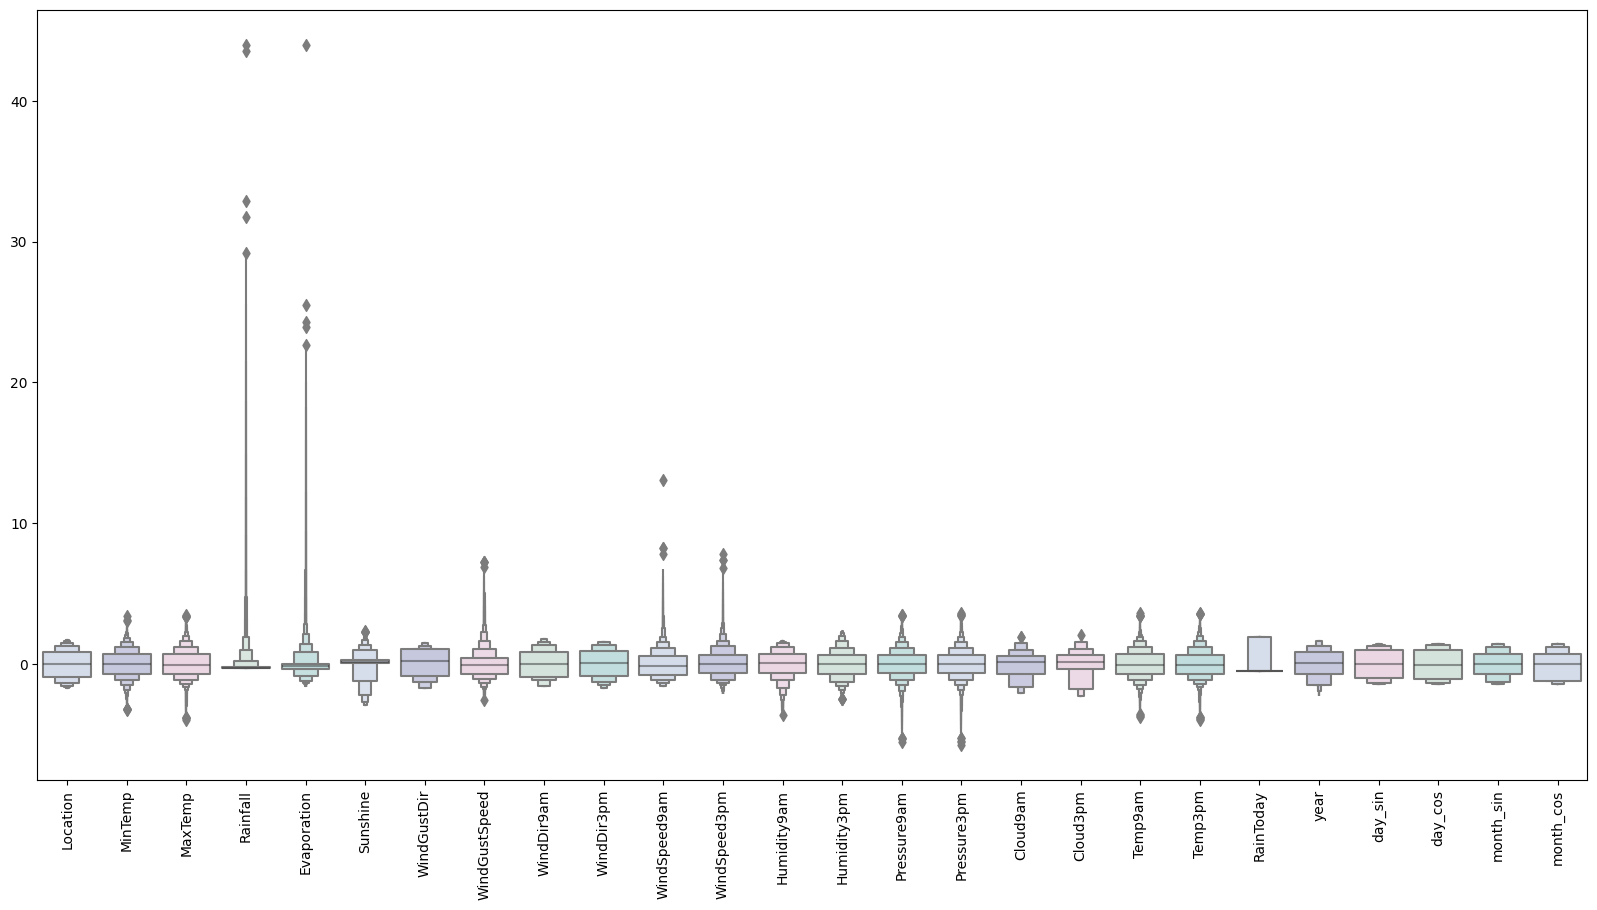

In [42]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [43]:
features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]



In [44]:
features['RainTomorrow'] = target

In [45]:
features.shape

(127536, 27)

In [46]:
features

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud3pm,Temp9am,Temp3pm,RainToday,year,day_sin,day_cos,month_sin,month_cos,RainTomorrow
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,1.045228,0.307739,1.328766,1.366458,...,0.137693,-0.013506,0.019135,-0.529795,-1.879575,0.278970,1.426023,-0.016425,1.434192,0
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.258262,0.307739,-0.221338,1.586813,...,0.137693,0.033011,0.384064,-0.529795,-1.879575,0.549587,1.339551,-0.016425,1.434192,0
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.471296,0.460168,1.328766,1.586813,...,-1.286294,0.622225,0.223495,-0.529795,-1.879575,0.797572,1.199371,-0.016425,1.434192,0
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.872075,-1.216548,0.442992,-1.718521,...,0.137693,0.172562,0.705202,-0.529795,-1.879575,1.012774,1.011221,-0.016425,1.434192,0
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,1.045228,0.079096,-1.328556,-0.176032,...,1.561680,0.126045,1.172312,-0.529795,-1.879575,1.186382,0.782805,-0.016425,1.434192,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.209285,-1.475402,0.025964,-0.275097,-0.119472,0.14871,-1.724209,-0.683048,0.442992,-1.498165,...,0.137693,-1.067887,0.106718,-0.529795,1.666978,-1.261688,-0.601030,-0.016425,-1.388032,0
145456,1.209285,-1.349730,0.294010,-0.275097,-0.119472,0.14871,-0.446007,-1.368977,0.442992,-1.057454,...,0.137693,-0.943842,0.413259,-0.529795,1.666978,-1.360192,-0.330159,-0.016425,-1.388032,0
145457,1.209285,-1.066967,0.519733,-0.275097,-0.119472,0.14871,-1.085108,-0.225761,0.442992,1.366458,...,0.137693,-0.695753,0.646814,-0.529795,1.666978,-1.403140,-0.044639,-0.016425,-1.388032,0
145458,1.209285,-0.689950,0.533840,-0.275097,-0.119472,0.14871,0.193094,-0.911691,0.664436,-1.057454,...,-1.286294,-0.292607,0.632217,-0.529795,1.666978,-1.388775,0.243842,-0.016425,-1.388032,0


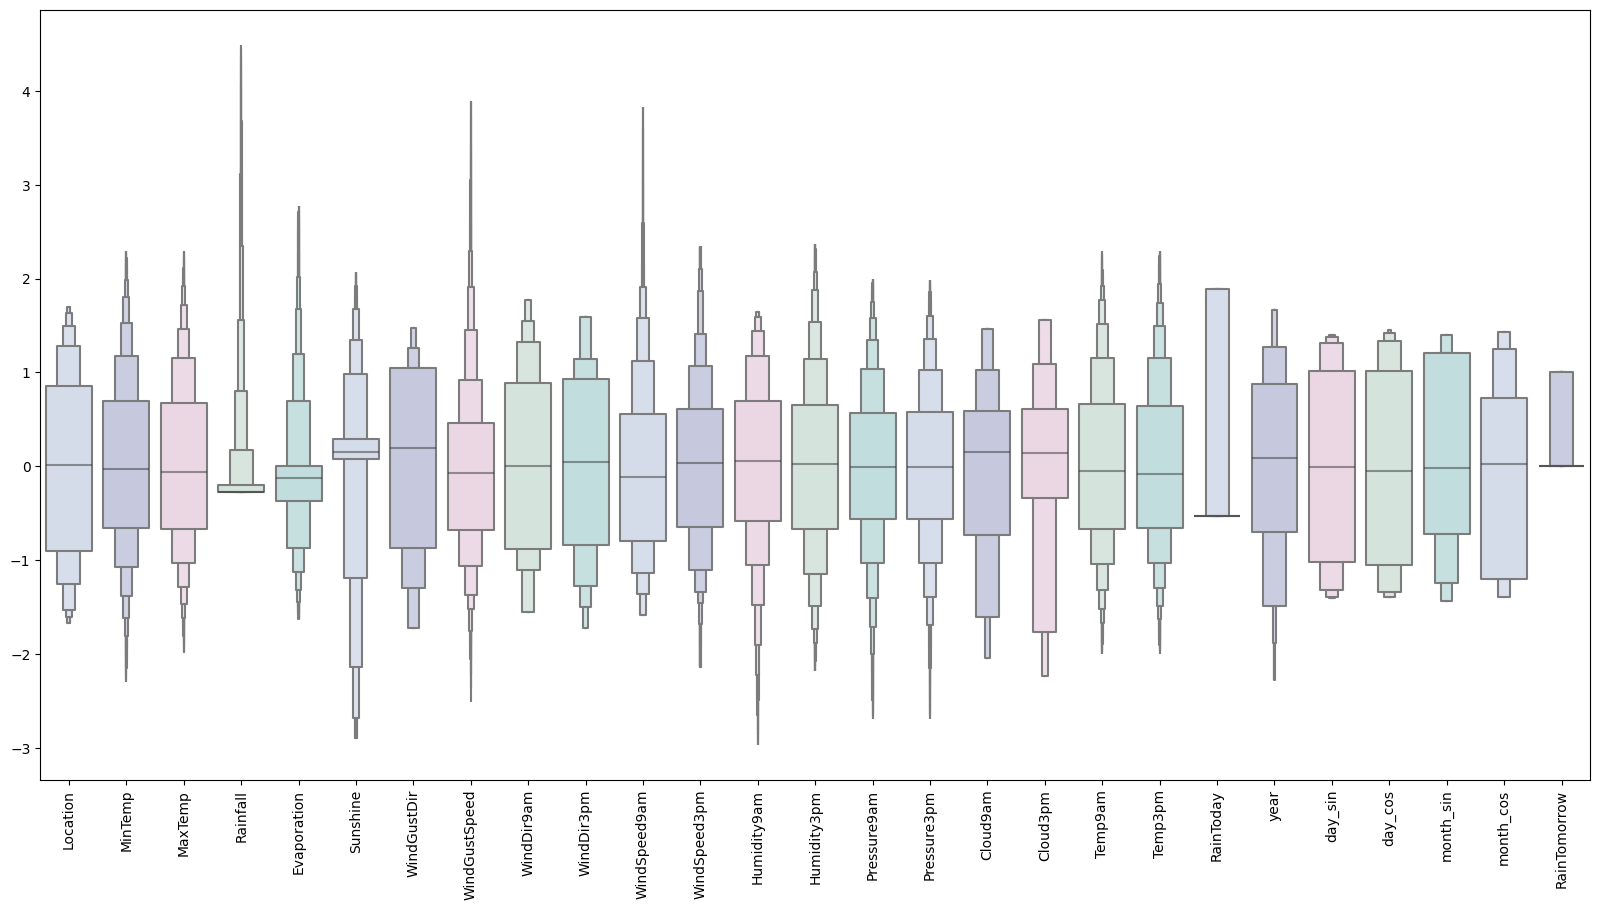

In [47]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()


## Model building

### Random Forest

In [48]:
x = features.drop('RainTomorrow',axis=1)
y = features['RainTomorrow']

In [49]:
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,day_sin,day_cos,month_sin,month_cos
0,-1.531666,0.189757,-0.044575,-0.203581,-0.119472,0.14871,1.045228,0.307739,1.328766,1.366458,...,1.464068,0.137693,-0.013506,0.019135,-0.529795,-1.879575,0.278970,1.426023,-0.016425,1.434192
1,-1.531666,-0.752786,0.265794,-0.275097,-0.119472,0.14871,1.258262,0.307739,-0.221338,1.586813,...,0.149133,0.137693,0.033011,0.384064,-0.529795,-1.879575,0.549587,1.339551,-0.016425,1.434192
2,-1.531666,0.111212,0.350440,-0.275097,-0.119472,0.14871,1.471296,0.460168,1.328766,1.586813,...,0.149133,-1.286294,0.622225,0.223495,-0.529795,-1.879575,0.797572,1.199371,-0.016425,1.434192
3,-1.531666,-0.470023,0.674917,-0.275097,-0.119472,0.14871,-0.872075,-1.216548,0.442992,-1.718521,...,0.149133,0.137693,0.172562,0.705202,-0.529795,-1.879575,1.012774,1.011221,-0.016425,1.434192
4,-1.531666,0.833828,1.281548,-0.155903,-0.119472,0.14871,1.045228,0.079096,-1.328556,-0.176032,...,1.025756,1.561680,0.126045,1.172312,-0.529795,-1.879575,1.186382,0.782805,-0.016425,1.434192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.209285,-1.475402,0.025964,-0.275097,-0.119472,0.14871,-1.724209,-0.683048,0.442992,-1.498165,...,0.149133,0.137693,-1.067887,0.106718,-0.529795,1.666978,-1.261688,-0.601030,-0.016425,-1.388032
145456,1.209285,-1.349730,0.294010,-0.275097,-0.119472,0.14871,-0.446007,-1.368977,0.442992,-1.057454,...,0.149133,0.137693,-0.943842,0.413259,-0.529795,1.666978,-1.360192,-0.330159,-0.016425,-1.388032
145457,1.209285,-1.066967,0.519733,-0.275097,-0.119472,0.14871,-1.085108,-0.225761,0.442992,1.366458,...,0.149133,0.137693,-0.695753,0.646814,-0.529795,1.666978,-1.403140,-0.044639,-0.016425,-1.388032
145458,1.209285,-0.689950,0.533840,-0.275097,-0.119472,0.14871,0.193094,-0.911691,0.664436,-1.057454,...,-0.727490,-1.286294,-0.292607,0.632217,-0.529795,1.666978,-1.388775,0.243842,-0.016425,-1.388032


In [50]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 127536, dtype: int32

In [51]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [52]:
X_train.shape

(102028, 26)

In [53]:
X_test.shape

(25508, 26)

In [54]:
rf = RandomForestClassifier().fit(X_train,y_train)

In [55]:
p = rf.predict(X_test)

In [56]:
p

array([1, 0, 0, ..., 0, 0, 0])

In [57]:
print(confusion_matrix(p,y_test))

[[19248  2881]
 [  776  2603]]


In [58]:
print(accuracy_score(p,y_test))

0.8566332131096127


In [59]:
print(classification_report(p,y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     22129
           1       0.47      0.77      0.59      3379

    accuracy                           0.86     25508
   macro avg       0.72      0.82      0.75     25508
weighted avg       0.90      0.86      0.87     25508



In [60]:
print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.857


## Feature importance

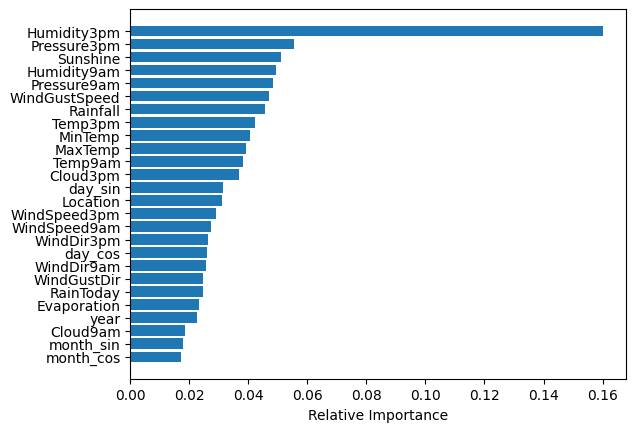

In [61]:
feature_names = list(x.columns)
imp=rf.feature_importances_
#plt.figure(figsize=(8,14))
indices = np.argsort(imp)
plt.barh(range(len(indices)),imp[indices],align = 'center')
plt.yticks(range(len(indices)),[feature_names[i] for i in indices ])
plt.xlabel('Relative Importance')
plt.show()

## ANN 

In [62]:
model = Sequential()
model.add(Dense(64,activation='relu',input_dim=26))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))

#model.add(Dense(16,activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


In [64]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [65]:
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [66]:
history = model.fit(X_train,y_train,verbose=1,batch_size=32,epochs = 500,validation_split = 0.2,callbacks=callback,shuffle = False)

Epoch 1/500
2551/2551 [==============================] - 7s 2ms/step - loss: 0.4017 - accuracy: 0.8231 - val_loss: 0.3571 - val_accuracy: 0.8470
Epoch 2/500
2551/2551 [==============================] - 6s 2ms/step - loss: 0.3724 - accuracy: 0.8398 - val_loss: 0.3519 - val_accuracy: 0.8496
Epoch 3/500
2551/2551 [==============================] - 6s 2ms/step - loss: 0.3670 - accuracy: 0.8417 - val_loss: 0.3496 - val_accuracy: 0.8503
Epoch 4/500
2551/2551 [==============================] - 6s 2ms/step - loss: 0.3642 - accuracy: 0.8432 - val_loss: 0.3484 - val_accuracy: 0.8498
Epoch 5/500
2551/2551 [==============================] - 6s 2ms/step - loss: 0.3619 - accuracy: 0.8435 - val_loss: 0.3471 - val_accuracy: 0.8517
Epoch 6/500
2551/2551 [==============================] - 7s 3ms/step - loss: 0.3615 - accuracy: 0.8446 - val_loss: 0.3469 - val_accuracy: 0.8513
Epoch 7/500
2551/2551 [==============================] - 7s 3ms/step - loss: 0.3597 - accuracy: 0.8454 - val_loss: 0.3440 - val_ac

In [67]:
y_pred = model.predict(X_test)

798/798 [==============================] - 1s 1ms/step


In [68]:
y_pred = y_pred.argmax(axis=-1)

In [69]:
print(accuracy_score(y_test,y_pred))

0.785008624745178


In [70]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     25508
           1       0.00      0.00      0.00         0

    accuracy                           0.79     25508
   macro avg       0.50      0.39      0.44     25508
weighted avg       1.00      0.79      0.88     25508



<AxesSubplot:>

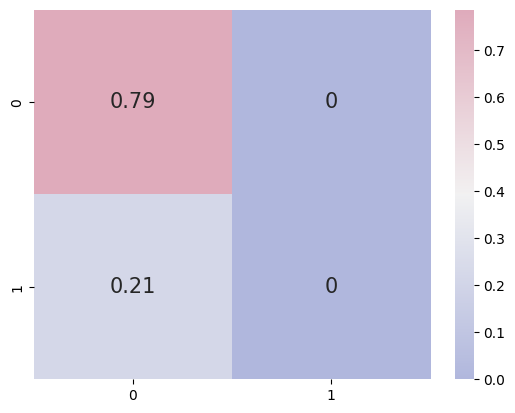

In [71]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
#plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [72]:
print(confusion_matrix(y_test,y_pred))

[[20024     0]
 [ 5484     0]]


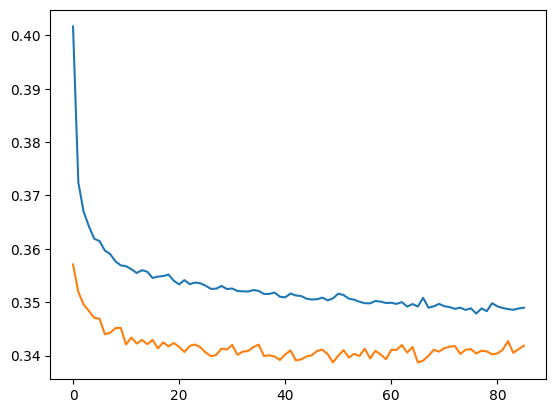

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

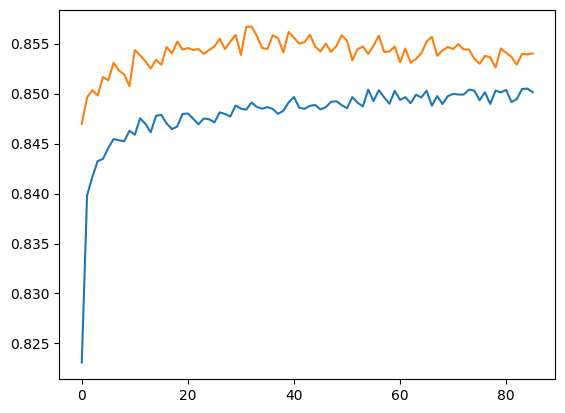

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [75]:
X_train.shape

(102028, 26)

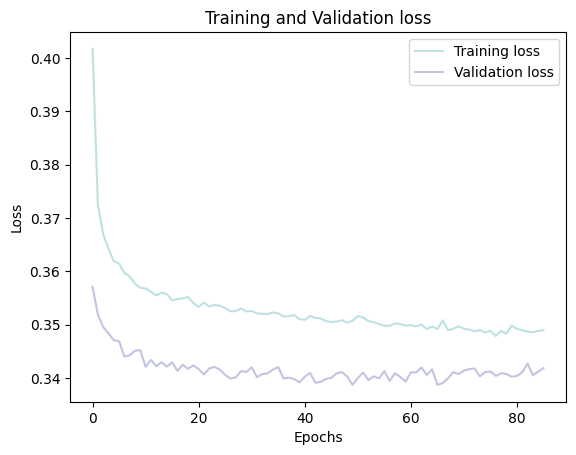

In [76]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()


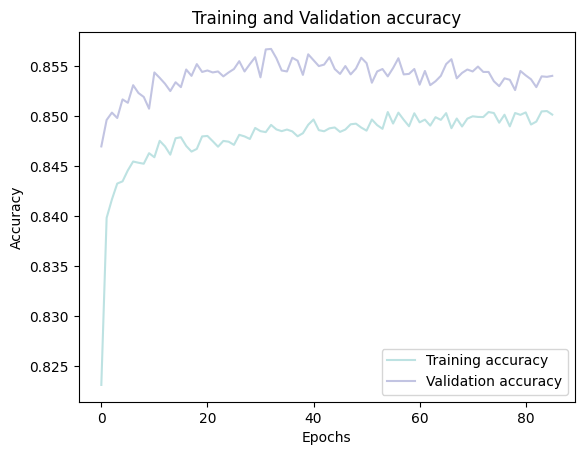

In [77]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Hyperparameter-tuning in ANN

In [78]:
# to select appropriate optimizer

import keras_tuner as kt


In [79]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(102028, 26)
(102028,)
(25508, 26)
(25508,)


In [ ]:
input_dim

In [106]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(32,input_dim=26,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    optimizer = hp.Choice('optimizer',values=['sgd','adam','adadelta','rmsprop','nadam'])
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [107]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=10,overwrite=True)

In [110]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Trial 5 Complete [00h 00m 36s]
val_accuracy: 0.8498510122299194

Best val_accuracy So Far: 0.8505958914756775
Total elapsed time: 00h 03m 33s
INFO:tensorflow:Oracle triggered exit


In [111]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [114]:
model= tuner.get_best_models(num_models=1)[0]

In [117]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
3189/3189 [==============================] - 7s 2ms/step - loss: 0.3428 - accuracy: 0.8512 - val_loss: 0.3431 - val_accuracy: 0.8499
Epoch 2/5
3189/3189 [==============================] - 7s 2ms/step - loss: 0.3420 - accuracy: 0.8522 - val_loss: 0.3423 - val_accuracy: 0.8506
Epoch 3/5
3189/3189 [==============================] - 7s 2ms/step - loss: 0.3415 - accuracy: 0.8522 - val_loss: 0.3422 - val_accuracy: 0.8517
Epoch 4/5
3189/3189 [==============================] - 7s 2ms/step - loss: 0.3409 - accuracy: 0.8523 - val_loss: 0.3424 - val_accuracy: 0.8520
Epoch 5/5
3189/3189 [==============================] - 7s 2ms/step - loss: 0.3400 - accuracy: 0.8525 - val_loss: 0.3418 - val_accuracy: 0.8511


In [85]:
# to select the no of nodes in a layer

def build_model(hp):
    model = Sequential()
    units = hp.Int('units',min_value=8,max_value=128)
    model.add(Dense(units,activation='relu',input_dim=26))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [86]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir')

INFO:tensorflow:Reloading Oracle from existing project mydir\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from mydir\untitled_project\tuner0.json


In [109]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adam'}

In [88]:
model = tuner.get_best_models(num_models=1)[0]

In [89]:
# to select num of layers

def build_model(hp):
    model = Sequential()
    model.add(Dense(72,activation='relu',input_dim=26))
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        model.add(Dense(72,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [90]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydir',project_name='num_layers')

INFO:tensorflow:Reloading Oracle from existing project mydir\num_layers\oracle.json
INFO:tensorflow:Reloading Tuner from mydir\num_layers\tuner0.json


In [91]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

INFO:tensorflow:Oracle triggered exit


In [92]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 4}

In [93]:
#model = tuner.get_best_models(num_models=1)[0]

In [129]:
# all in all one
def build_model(hp):
    model = Sequential()
    counter=0
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        if counter == 0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values = ['relu','sigmoid','tanh']),
                            input_dim=26))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            
        else:
            
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values = ['relu','sigmoid','tanh'])))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            
        counter+=1
        
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer',values=['sgd','adam','adadelta','rmsprop','nadam']),loss='binary_crossentropy',metrics=['accuracy'])
    return model
            

In [130]:
#tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='final', overwrite =True)

In [136]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydir',project_name='final1', overwrite = True)

In [139]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=1)

Trial 3 Complete [00h 00m 14s]
val_accuracy: 0.8270346522331238

Best val_accuracy So Far: 0.8270346522331238
Total elapsed time: 00h 01m 49s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#tuner.search(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

In [140]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 5,
 'units0': 104,
 'activation0': 'tanh',
 'dropout0': 0.1,
 'optimizer': 'rmsprop',
 'units1': 96,
 'activation1': 'sigmoid',
 'dropout1': 0.9,
 'units2': 24,
 'activation2': 'tanh',
 'dropout2': 0.7,
 'units3': 96,
 'activation3': 'sigmoid',
 'dropout3': 0.7,
 'units4': 112,
 'activation4': 'sigmoid',
 'dropout4': 0.9,
 'units5': 72,
 'activation5': 'sigmoid',
 'dropout5': 0.6,
 'units6': 48,
 'activation6': 'tanh',
 'dropout6': 0.5,
 'units7': 16,
 'activation7': 'relu',
 'dropout7': 0.4}

In [141]:
model = tuner.get_best_models(num_models=1)[0]

In [142]:
model

In [144]:
model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 200)

Epoch 1/200
3189/3189 [==============================] - 11s 3ms/step - loss: 0.4397 - accuracy: 0.8129 - val_loss: 0.3996 - val_accuracy: 0.8366
Epoch 2/200
3189/3189 [==============================] - 10s 3ms/step - loss: 0.4357 - accuracy: 0.8183 - val_loss: 0.3990 - val_accuracy: 0.8341
Epoch 3/200
3189/3189 [==============================] - 10s 3ms/step - loss: 0.4366 - accuracy: 0.8222 - val_loss: 0.4033 - val_accuracy: 0.8377
Epoch 4/200
3189/3189 [==============================] - 10s 3ms/step - loss: 0.4387 - accuracy: 0.8240 - val_loss: 0.4045 - val_accuracy: 0.8388
Epoch 5/200
3189/3189 [==============================] - 11s 3ms/step - loss: 0.4400 - accuracy: 0.8272 - val_loss: 0.4044 - val_accuracy: 0.8386
Epoch 6/200
3189/3189 [==============================] - 10s 3ms/step - loss: 0.4386 - accuracy: 0.8270 - val_loss: 0.4066 - val_accuracy: 0.8381
Epoch 7/200
3189/3189 [==============================] - 10s 3ms/step - loss: 0.4404 - accuracy: 0.8298 - val_loss: 0.4115 -